# Data Reading and preprocessing

In [1]:
#import zipfile
#with zipfile.ZipFile('project3_COSC525.zip', 'r') as zip_ref:
    #zip_ref.extractall()
#zip_ref.close()



In [1]:
import numpy as np
np.random.seed(42)

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
# Define the image size and number of channels
img_height, img_width, img_channels = 32, 32, 3

In [7]:
pwd

'C:\\Users\\aifeanyi\\OneDrive - University of Tennessee\\UT ESE Courses\\COSC 525_Deep Learning\\Assignment_3'

In [4]:

# Load the training data from a folder
train_dir = "C:\\Users\\aifeanyi\\OneDrive - University of Tennessee\\UT ESE Courses\\COSC 525_Deep Learning\\Assignment_3\\project3_COSC525\\train"
val_dir = "C:\\Users\\aifeanyi\\OneDrive - University of Tennessee\\UT ESE Courses\\COSC 525_Deep Learning\\Assignment_3\\project3_COSC525\\val"

num_train = len(os.listdir(train_dir))
num_val = len(os.listdir(val_dir))

num_train,num_val

(86744, 10954)

In [5]:
# Define an empty list to store the image data
img_data = []
path = []

# Loop over all files in the folder and load the images
for i in range(num_train):
    img_path = os.path.join(train_dir, f"{i+1}.jpg")
    path.append(img_path)
    img = load_img(img_path)
    img_array = img_to_array(img)
    img_data.append(img_array)

In [6]:
# Convert the list of image arrays to a NumPy array
x_train = np.array(img_data)

# Normalize the pixel values using min-max normalization
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, img_height*img_width*img_channels))
x_train = x_train.reshape(-1, img_height, img_width, img_channels)

In [7]:
x_train.shape

(86744, 32, 32, 3)

In [8]:
# Define an empty list to store the image data
img_data = []
    
# Loop over all files in the folder and load the images
for i in range(num_val):
    img_path = os.path.join(val_dir, f"{i+1}.jpg")
    img = load_img(img_path)
    img_array = img_to_array(img)
    img_data.append(img_array)    

In [9]:
# Convert the list of image arrays to a NumPy array
val = np.array(img_data)

# Normalize the pixel values using min-max normalization from train
#scaler = MinMaxScaler()
val = scaler.transform(val.reshape(-1, img_height*img_width*img_channels))
val = val.reshape(-1, img_height, img_width, img_channels)


In [10]:
x_train.shape,val.shape

((86744, 32, 32, 3), (10954, 32, 32, 3))

In [11]:
train_label = pd.read_csv("fairface_label_train.csv")
val_label= pd.read_csv("fairface_label_val.csv")

In [12]:
# train_label.head()
val_label.head()
#len(train_label["gender"].unique())

,file,age,gender,race,service_test
0,val/1.jpg,3-9,Male,East Asian,False
1,val/2.jpg,50-59,Female,East Asian,True
2,val/3.jpg,30-39,Male,White,True
3,val/4.jpg,20-29,Female,Latino_Hispanic,True
4,val/5.jpg,20-29,Male,Southeast Asian,False


In [24]:
train_label_ = train_label[["gender","race"]]
train_label_1 = train_label["gender"]
train_label_2 = train_label["race"]
val_label_ = val_label[["gender","race"]]
val_label_1 = val_label["gender"]
val_label_2 = val_label["race"]

In [25]:
train_label_2
#one hot encoding for gender
#train_label_ = pd.get_dummies(train_label_, columns=['gender'], drop_first=True)

0        East Asian
1            Indian
2             Black
3            Indian
4            Indian
            ...    
86739        Indian
86740        Indian
86741        Indian
86742         Black
86743         White
Name: race, Length: 86744, dtype: object

In [26]:
#categorical encoding for race
train_label_gender = pd.get_dummies(train_label_1, columns=['gender'])
train_label_race = pd.get_dummies(train_label_2, columns=['race'])

val_label_gender = pd.get_dummies(val_label_1, columns=['gender'])
val_label_race = pd.get_dummies(val_label_2, columns=['race'])


In [29]:
train_label_race

,Black,East Asian,Indian,Latino_Hispanic,Middle Eastern,Southeast Asian,White
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
86739,0,0,1,0,0,0,0
86740,0,0,1,0,0,0,0
86741,0,0,1,0,0,0,0
86742,1,0,0,0,0,0,0


In [30]:
y_train_both = np.array(train_label_)
y_val_both = np.array(val_label_)
y_gender_train = np.array(train_label_gender)
y_gender_val = np.array(val_label_gender)
y_race_train = np.array(train_label_race)
y_race_val = np.array(val_label_race)

# Task 1-A: Fully Connected Neural Network
## Label - gender

In [31]:
# import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
input_shape = (img_height, img_width, img_channels)
# Define the model architecture
model_fully_gender = Sequential()
# Flatten the input image
model_fully_gender.add(Flatten(input_shape=input_shape)) 
# Add the first hidden layer
model_fully_gender.add(Dense(1024, activation='tanh'))
# Add the second hidden layer
model_fully_gender.add(Dense(512, activation='sigmoid'))
# Add the third hidden layer
model_fully_gender.add(Dense(100, activation='relu'))
#Add output layer
model_fully_gender.add(tf.keras.layers.Dense(y_gender_train.shape[1], activation='softmax'))
model_fully_gender.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 100)               51300     
                                                                 
 dense_6 (Dense)             (None, 2)                 202       
                                                                 
Total params: 3,723,054
Trainable params: 3,723,054
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compile the model with categorical crossentropy loss, Adam optimizer with a learning rate of 0.001, and accuracy metrics
model_fully_gender.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model to the training data
history = model_fully_gender.fit(x_train, y_gender_train, epochs=10, batch_size=64, validation_data=(val, y_gender_val))

Epoch 1/10
1356/1356 [==============================] - 52s 38ms/step - loss: 0.6501 - accuracy: 0.6215 - val_loss: 0.6833 - val_accuracy: 0.5902
Epoch 2/10
1356/1356 [==============================] - 62s 46ms/step - loss: 0.6223 - accuracy: 0.6548 - val_loss: 0.6150 - val_accuracy: 0.6671
Epoch 3/10
1356/1356 [==============================] - 66s 49ms/step - loss: 0.5992 - accuracy: 0.6757 - val_loss: 0.5818 - val_accuracy: 0.6908
Epoch 4/10
1356/1356 [==============================] - 77s 57ms/step - loss: 0.5867 - accuracy: 0.6825 - val_loss: 0.5691 - val_accuracy: 0.6998
Epoch 5/10
1356/1356 [==============================] - 79s 58ms/step - loss: 0.5952 - accuracy: 0.6807 - val_loss: 0.5804 - val_accuracy: 0.6970
Epoch 6/10
1356/1356 [==============================] - 69s 51ms/step - loss: 0.5856 - accuracy: 0.6908 - val_loss: 0.5777 - val_accuracy: 0.6968
Epoch 7/10
1356/1356 [==============================] - 67s 50ms/step - loss: 0.5794 - accuracy: 0.6897 - val_loss: 0.5657 -

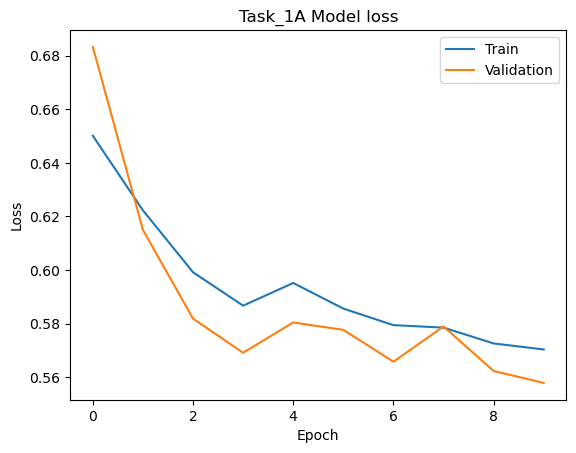

In [33]:
import matplotlib.pyplot as plt
# Plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Task_1A Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()




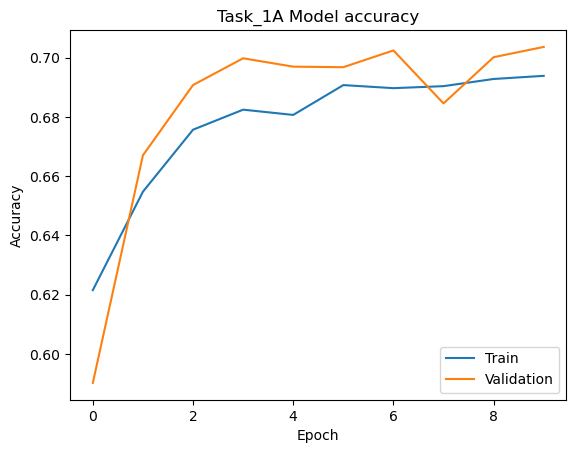

In [34]:
# Plot the training and validation accuracy for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Task_1A Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [23]:
# Evaluate the model on the test set
loss, accuracy = model_fully_gender.evaluate(val, y_gender_val)

print("Final test set loss: {:.3f}".format(loss))
print("Final test set accuracy: {:.3f}".format(accuracy))



343/343 [==============================] - 1s 2ms/step - loss: 0.5903 - accuracy: 0.6804
Final test set loss: 0.590
Final test set accuracy: 0.680


In [35]:
# Predict the classes of the test set
y_pred = np.argmax(model_fully_gender.predict(val), axis=-1)

y_true = np.argmax(y_gender_val, axis=1)
#np.argmax(y1_val, axis=1)
y_true

343/343 [==============================] - 3s 7ms/step


array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

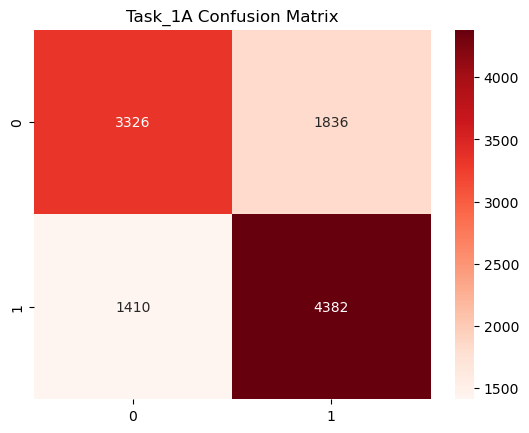

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.title('Task_1A Confusion Matrix')
plt.show()

# Task 1-B: Fully Connected Neural Network
## Label - race

In [42]:
# import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
input_shape = (img_height, img_width, img_channels)
# Define the model architecture
model_FC_race = Sequential()
# Flatten the input image
model_FC_race.add(Flatten(input_shape=input_shape)) 
# Add the first hidden layer
model_FC_race.add(Dense(1024, activation='tanh'))
# Add the second hidden layer
model_FC_race.add(Dense(512, activation='sigmoid'))
# Add the third hidden layer
model_FC_race.add(Dense(100, activation='relu'))
#Add output layer
model_FC_race.add(tf.keras.layers.Dense(y_race_train.shape[1], activation='softmax'))
model_FC_race.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_11 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_12 (Dense)            (None, 512)               524800    
                                                                 
 dense_13 (Dense)            (None, 100)               51300     
                                                                 
 dense_14 (Dense)            (None, 7)                 707       
                                                                 
Total params: 3,723,559
Trainable params: 3,723,559
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model with categorical crossentropy loss, Adam optimizer with a learning rate of 0.001, and accuracy metrics
model_FC_race.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
# Fit the model to the training data
# initial_epoch=20
history = model_FC_race.fit(x_train, y_race_train, epochs=10, batch_size=64, validation_data=(val, y_race_val) )

Epoch 1/10
1356/1356 [==============================] - 64s 47ms/step - loss: 1.8521 - accuracy: 0.2536 - val_loss: 1.7722 - val_accuracy: 0.3031
Epoch 2/10
1356/1356 [==============================] - 74s 54ms/step - loss: 1.7701 - accuracy: 0.2993 - val_loss: 1.8069 - val_accuracy: 0.2881
Epoch 3/10
1356/1356 [==============================] - 88s 65ms/step - loss: 1.7441 - accuracy: 0.3102 - val_loss: 1.7465 - val_accuracy: 0.3050
Epoch 4/10
1356/1356 [==============================] - 88s 65ms/step - loss: 1.7216 - accuracy: 0.3223 - val_loss: 1.7039 - val_accuracy: 0.3273
Epoch 5/10
1356/1356 [==============================] - 90s 67ms/step - loss: 1.7078 - accuracy: 0.3358 - val_loss: 1.6872 - val_accuracy: 0.3457
Epoch 6/10
1356/1356 [==============================] - 90s 66ms/step - loss: 1.6899 - accuracy: 0.3437 - val_loss: 1.6705 - val_accuracy: 0.3490
Epoch 7/10
1356/1356 [==============================] - 91s 67ms/step - loss: 1.6799 - accuracy: 0.3495 - val_loss: 1.6864 -

In [45]:
#Save the trained Model
model_FC_race.save('model_FC_race.h5')

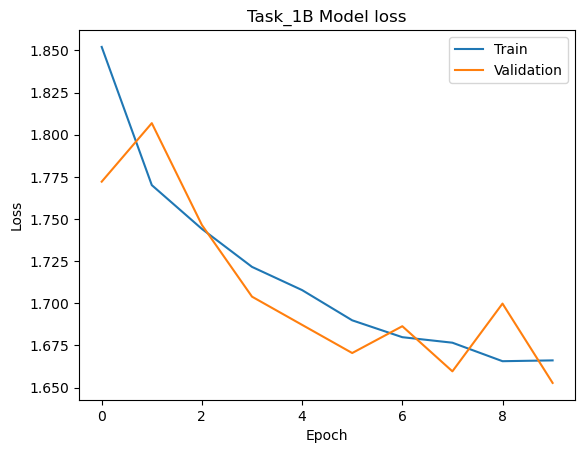

In [48]:
import matplotlib.pyplot as plt
# Plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Task_1B Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()





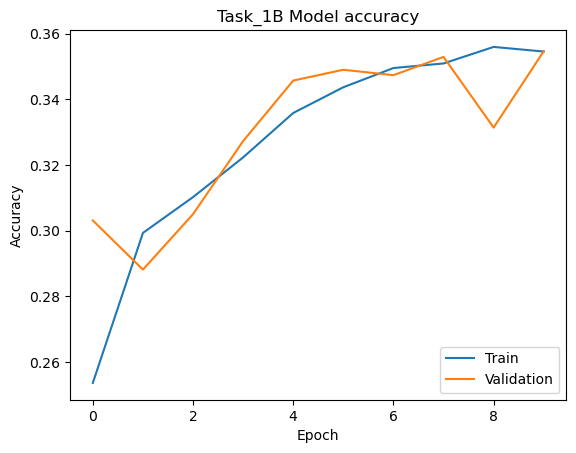

In [49]:
# Plot the training and validation accuracy for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Task_1B Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [50]:
# Evaluate the model on the test set
loss, accuracy = model_FC_race.evaluate(val, y_race_val)

print("Final test set loss: {:.3f}".format(loss))
print("Final test set accuracy: {:.3f}".format(accuracy))

343/343 [==============================] - 2s 7ms/step - loss: 1.6527 - accuracy: 0.3547
Final test set loss: 1.653
Final test set accuracy: 0.355


In [51]:
# Predict the classes of the test set
y_pred = np.argmax(model_FC_race.predict(val), axis=-1)

y_true = np.argmax(y_race_val, axis=1)
#np.argmax(y1_val, axis=1)
y_true

343/343 [==============================] - 2s 6ms/step


array([1, 1, 6, ..., 3, 1, 3], dtype=int64)

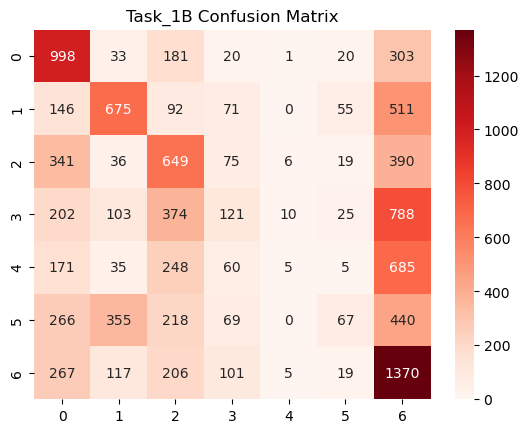

In [53]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.title('Task_1B Confusion Matrix')
plt.show()

# Task 2-A: Convolutional Neural Network
## Label - gender

In [78]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
input_shape = (img_height, img_width, img_channels)
# Define the model architecture
model_conv_gender = Sequential()
model_conv_gender.add(Conv2D(40, (5, 5), activation='relu', input_shape=input_shape)) 
model_conv_gender.add(MaxPooling2D((2, 2)))
model_conv_gender.add(Flatten())
model_conv_gender.add(Dense(100, activation='relu'))
model_conv_gender.add(Dense(y_gender_train.shape[1], activation='softmax'))
model_conv_gender.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 40)        3040      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 40)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 7840)              0         
                                                                 
 dense_19 (Dense)            (None, 100)               784100    
                                                                 
 dense_20 (Dense)            (None, 2)                 202       
                                                                 
Total params: 787,342
Trainable params: 787,342
Non-trainable params: 0
________________________________________________

In [68]:
#compile model
model_conv_gender.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Fit the model to the training data
history_2 = model_conv_gender.fit(x_train, y_gender_train, epochs=13, batch_size=64, validation_data=(val, y_gender_val))

Epoch 1/13
1356/1356 [==============================] - 77s 56ms/step - loss: 0.5096 - accuracy: 0.7380 - val_loss: 0.4901 - val_accuracy: 0.7516
Epoch 2/13
1356/1356 [==============================] - 77s 57ms/step - loss: 0.4586 - accuracy: 0.7720 - val_loss: 0.4567 - val_accuracy: 0.7773
Epoch 3/13
1356/1356 [==============================] - 80s 59ms/step - loss: 0.4298 - accuracy: 0.7903 - val_loss: 0.4438 - val_accuracy: 0.7825
Epoch 4/13
1356/1356 [==============================] - 87s 64ms/step - loss: 0.4072 - accuracy: 0.8047 - val_loss: 0.4295 - val_accuracy: 0.7914
Epoch 5/13
1356/1356 [==============================] - 80s 59ms/step - loss: 0.3877 - accuracy: 0.8166 - val_loss: 0.4313 - val_accuracy: 0.7879
Epoch 6/13
1356/1356 [==============================] - 79s 58ms/step - loss: 0.3687 - accuracy: 0.8263 - val_loss: 0.4325 - val_accuracy: 0.7925
Epoch 7/13
1356/1356 [==============================] - 77s 57ms/step - loss: 0.3519 - accuracy: 0.8347 - val_loss: 0.4214 -

In [73]:
model_conv_gender.save('model_conv_gender.h5')

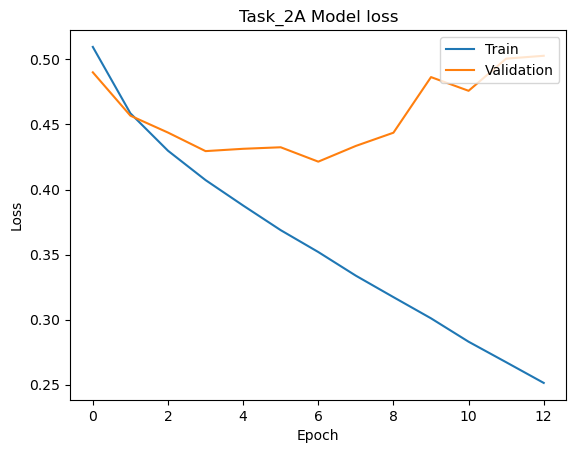

In [69]:
import matplotlib.pyplot as plt
# Plot the training and validation loss for each epoch
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Task_2A Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

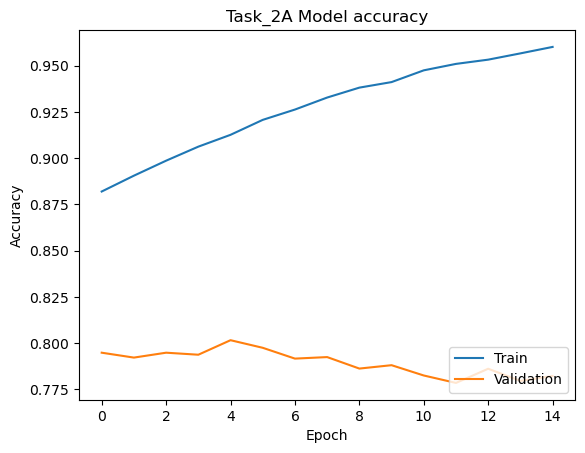

In [72]:
# Plot the training and validation accuracy for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Task_2A Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [74]:
# Evaluate the model on the test set
loss, accuracy = model_conv_gender.evaluate(val, y_gender_val)

print("Final test set loss: {:.3f}".format(loss))
print("Final test set accuracy: {:.3f}".format(accuracy))




343/343 [==============================] - 3s 10ms/step - loss: 0.5028 - accuracy: 0.7885
Final test set loss: 0.503
Final test set accuracy: 0.788


In [75]:
# Predict the classes of the test set
y_pred = np.argmax(model_conv_gender.predict(val), axis=-1)

y_true = np.argmax(y_gender_val, axis=1)
y_true

343/343 [==============================] - 3s 8ms/step


array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

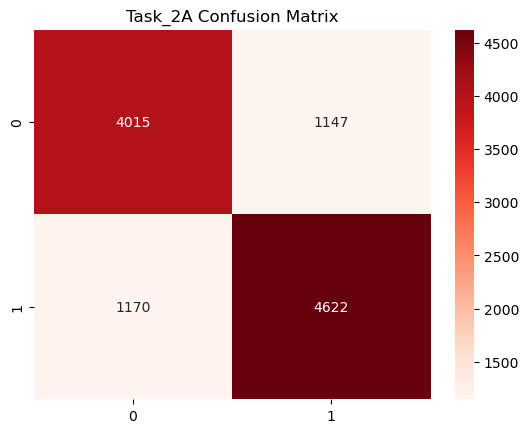

In [77]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.title('Task_2A Confusion Matrix')
plt.show()

# Task 2-B: Convolutional Neural Network
## Label - race

In [80]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
input_shape = (img_height, img_width, img_channels)
# Define the model architecture
model_conv_race = Sequential()
model_conv_race.add(Conv2D(40, (5, 5), activation='relu', input_shape=input_shape)) 
model_conv_race.add(MaxPooling2D((2, 2)))
model_conv_race.add(Flatten())
model_conv_race.add(Dense(100, activation='relu'))
model_conv_race.add(Dense(y_race_train.shape[1], activation='softmax'))
model_conv_race.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 40)        3040      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 40)       0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 7840)              0         
                                                                 
 dense_23 (Dense)            (None, 100)               784100    
                                                                 
 dense_24 (Dense)            (None, 7)                 707       
                                                                 
Total params: 787,847
Trainable params: 787,847
Non-trainable params: 0
_______________________________________________

In [81]:
#compile model
model_conv_race.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Fit the model to the training data
history = model_conv_race.fit(x_train, y_race_train, epochs=10, batch_size=64, validation_data=(val, y_race_val))

Epoch 1/10
1356/1356 [==============================] - 70s 51ms/step - loss: 1.6391 - accuracy: 0.3683 - val_loss: 1.5167 - val_accuracy: 0.4207
Epoch 2/10
1356/1356 [==============================] - 81s 60ms/step - loss: 1.4711 - accuracy: 0.4353 - val_loss: 1.4457 - val_accuracy: 0.4461
Epoch 3/10
1356/1356 [==============================] - 79s 58ms/step - loss: 1.3919 - accuracy: 0.4651 - val_loss: 1.4190 - val_accuracy: 0.4574
Epoch 4/10
1356/1356 [==============================] - 81s 59ms/step - loss: 1.3411 - accuracy: 0.4853 - val_loss: 1.3853 - val_accuracy: 0.4712
Epoch 5/10
1356/1356 [==============================] - 80s 59ms/step - loss: 1.2981 - accuracy: 0.5029 - val_loss: 1.3963 - val_accuracy: 0.4611
Epoch 6/10
1356/1356 [==============================] - 80s 59ms/step - loss: 1.2599 - accuracy: 0.5184 - val_loss: 1.3779 - val_accuracy: 0.4709
Epoch 7/10
1356/1356 [==============================] - 79s 59ms/step - loss: 1.2269 - accuracy: 0.5311 - val_loss: 1.3842 -

In [90]:
model_conv_race.save('model_conv_race.h5')

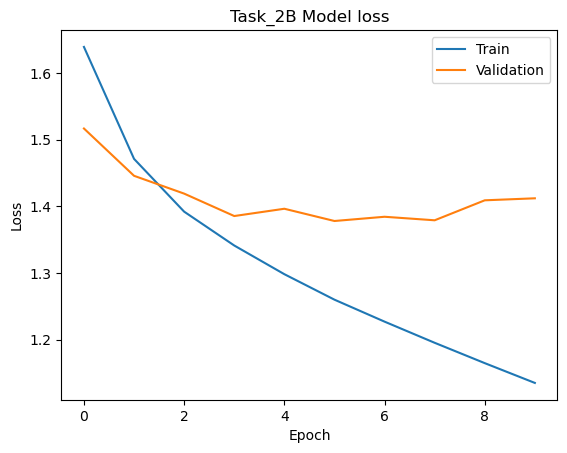

In [87]:
import matplotlib.pyplot as plt
# Plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Task_2B Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

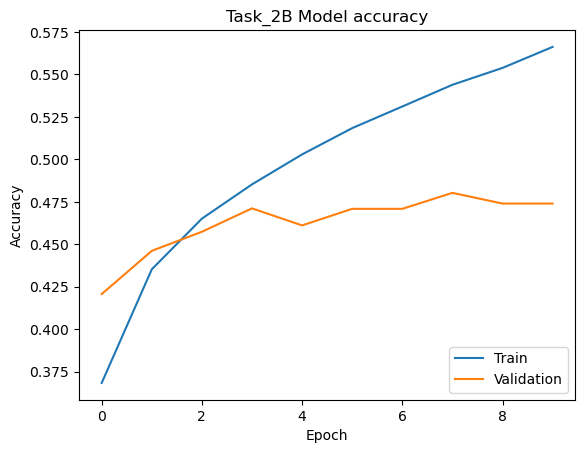

In [88]:
# Plot the training and validation accuracy for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Task_2B Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [85]:
# Evaluate the model on the test set
loss, accuracy = model_conv_race.evaluate(val, y_race_val)

print("Final test set loss: {:.3f}".format(loss))
print("Final test set accuracy: {:.3f}".format(accuracy))

343/343 [==============================] - 3s 8ms/step - loss: 1.4119 - accuracy: 0.4740
Final test set loss: 1.412
Final test set accuracy: 0.474


In [86]:
# Predict the classes of the test set
y_pred = np.argmax(model_conv_race.predict(val), axis=-1)

y_true = np.argmax(y_race_val, axis=1)
#np.argmax(y1_val, axis=1)
y_true

343/343 [==============================] - 3s 8ms/step


array([1, 1, 6, ..., 3, 1, 3], dtype=int64)

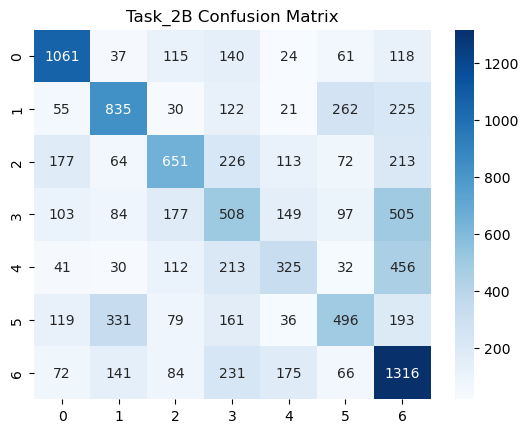

In [89]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Task_2B Confusion Matrix')
plt.show()

# Task 3-A: Custom Convolutional Neural Network
## Label - gender

In [92]:
input_shape = (img_height, img_width, img_channels)
# Define the model architecture
my_conv_gender = Sequential()
# Flatten the input image
my_conv_gender.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape)) 
my_conv_gender.add(MaxPooling2D((2, 2)))
my_conv_gender.add(Conv2D(64, (3, 3), activation='relu')) 
my_conv_gender.add(MaxPooling2D((2, 2)))
my_conv_gender.add(Flatten())
my_conv_gender.add(Dense(300, activation='relu'))
my_conv_gender.add(Dense(100, activation='relu'))
my_conv_gender.add(Dense(25, activation='relu'))
my_conv_gender.add(Dense(y_gender_train.shape[1], activation='softmax'))
my_conv_gender.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 2304)              0         
                                                                 
 dense_28 (Dense)            (None, 300)             

In [93]:
#compile model
my_conv_gender.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Fit the model to the training data
history = my_conv_gender.fit(x_train, y_gender_train, epochs=10, batch_size=64, validation_data=(val, y_gender_val))

Epoch 1/10
1356/1356 [==============================] - 87s 64ms/step - loss: 0.5375 - accuracy: 0.7150 - val_loss: 0.4586 - val_accuracy: 0.7742
Epoch 2/10
1356/1356 [==============================] - 70s 52ms/step - loss: 0.4497 - accuracy: 0.7755 - val_loss: 0.4303 - val_accuracy: 0.7909
Epoch 3/10
1356/1356 [==============================] - 74s 55ms/step - loss: 0.4128 - accuracy: 0.7999 - val_loss: 0.4172 - val_accuracy: 0.7982
Epoch 4/10
1356/1356 [==============================] - 81s 59ms/step - loss: 0.3860 - accuracy: 0.8145 - val_loss: 0.4070 - val_accuracy: 0.8011
Epoch 5/10
1356/1356 [==============================] - 78s 57ms/step - loss: 0.3629 - accuracy: 0.8285 - val_loss: 0.4072 - val_accuracy: 0.8035
Epoch 6/10
1356/1356 [==============================] - 67s 50ms/step - loss: 0.3392 - accuracy: 0.8416 - val_loss: 0.4099 - val_accuracy: 0.8006
Epoch 7/10
1356/1356 [==============================] - 70s 52ms/step - loss: 0.3155 - accuracy: 0.8537 - val_loss: 0.4566 -

In [99]:
my_conv_gender.save('my_conv_gender.h5')

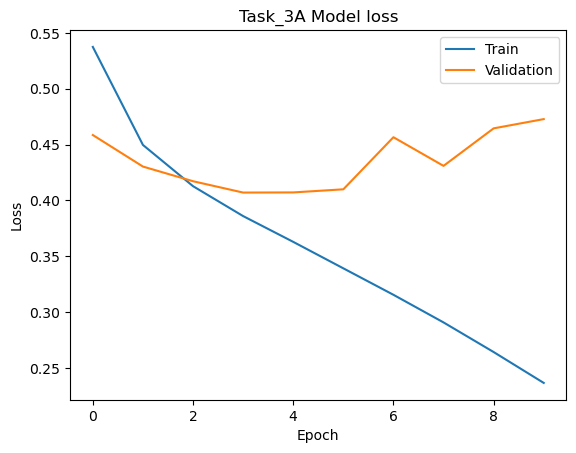

In [94]:
import matplotlib.pyplot as plt
# Plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Task_3A Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

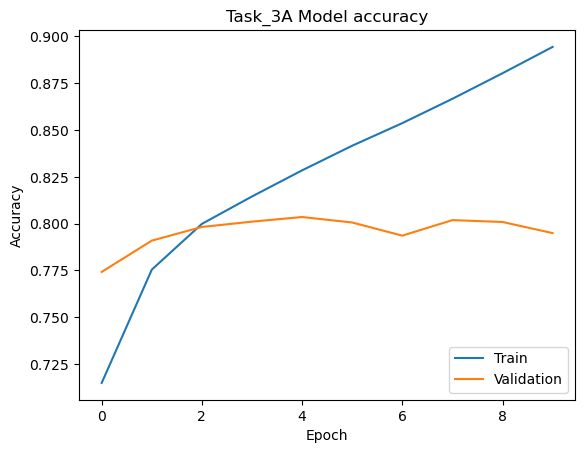

In [95]:
# Plot the training and validation accuracy for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Task_3A Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [97]:
# Evaluate the model on the test set
loss, accuracy = my_conv_gender.evaluate(val, y_gender_val)

print("Final test set loss: {:.3f}".format(loss))
print("Final test set accuracy: {:.3f}".format(accuracy))



343/343 [==============================] - 4s 11ms/step - loss: 0.4728 - accuracy: 0.7950
Final test set loss: 0.473
Final test set accuracy: 0.795


In [98]:
# Predict the classes of the test set
y_pred = np.argmax(my_conv_gender.predict(val), axis=-1)

y_true = np.argmax(y_gender_val, axis=1)
#np.argmax(y1_val, axis=1)
y_true

343/343 [==============================] - 4s 12ms/step


array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

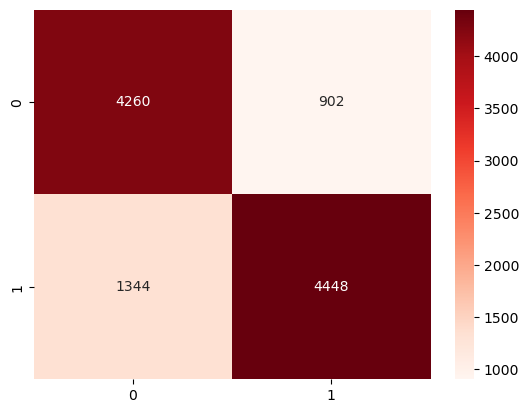

In [100]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.show()

# Task 3-B: Custom Convolutional Neural Network
## Label - race

In [101]:
input_shape = (img_height, img_width, img_channels)
# Define the model architecture
my_conv_race = Sequential()
# Flatten the input image
my_conv_race.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape)) 
my_conv_race.add(MaxPooling2D((2, 2)))
my_conv_race.add(Conv2D(64, (3, 3), activation='relu')) 
my_conv_race.add(MaxPooling2D((2, 2)))
my_conv_race.add(Flatten())
my_conv_race.add(Dense(300, activation='relu'))
my_conv_race.add(Dense(100, activation='relu'))
my_conv_race.add(Dense(25, activation='relu'))
my_conv_race.add(Dense(y_race_train.shape[1], activation='softmax'))
my_conv_race.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 2304)              0         
                                                                 
 dense_32 (Dense)            (None, 300)             

In [102]:
#compile model
my_conv_race.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [103]:
# Fit the model to the training data
history = my_conv_race.fit(x_train, y_race_train, epochs=10, batch_size=64, validation_data=(val, y_race_val))

Epoch 1/10
1356/1356 [==============================] - 84s 61ms/step - loss: 1.5801 - accuracy: 0.3797 - val_loss: 1.4085 - val_accuracy: 0.4529
Epoch 2/10
1356/1356 [==============================] - 84s 62ms/step - loss: 1.3729 - accuracy: 0.4684 - val_loss: 1.3380 - val_accuracy: 0.4820
Epoch 3/10
1356/1356 [==============================] - 79s 59ms/step - loss: 1.2834 - accuracy: 0.5044 - val_loss: 1.3320 - val_accuracy: 0.4836
Epoch 4/10
1356/1356 [==============================] - 78s 58ms/step - loss: 1.2116 - accuracy: 0.5318 - val_loss: 1.2795 - val_accuracy: 0.5068
Epoch 5/10
1356/1356 [==============================] - 74s 54ms/step - loss: 1.1489 - accuracy: 0.5571 - val_loss: 1.2869 - val_accuracy: 0.5069
Epoch 6/10
1356/1356 [==============================] - 67s 49ms/step - loss: 1.0856 - accuracy: 0.5819 - val_loss: 1.3175 - val_accuracy: 0.4993
Epoch 7/10
1356/1356 [==============================] - 67s 49ms/step - loss: 1.0252 - accuracy: 0.6073 - val_loss: 1.3343 -

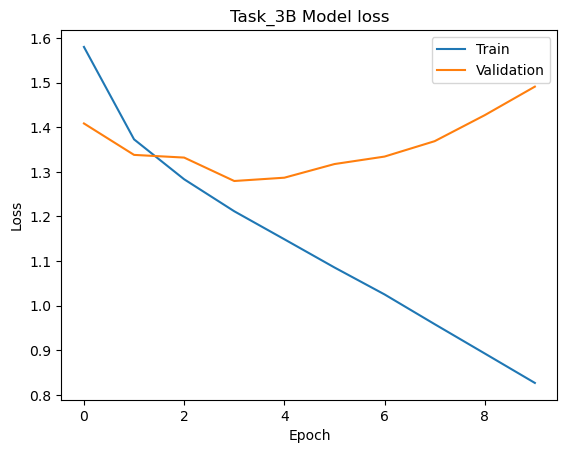

In [104]:
import matplotlib.pyplot as plt
# Plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Task_3B Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

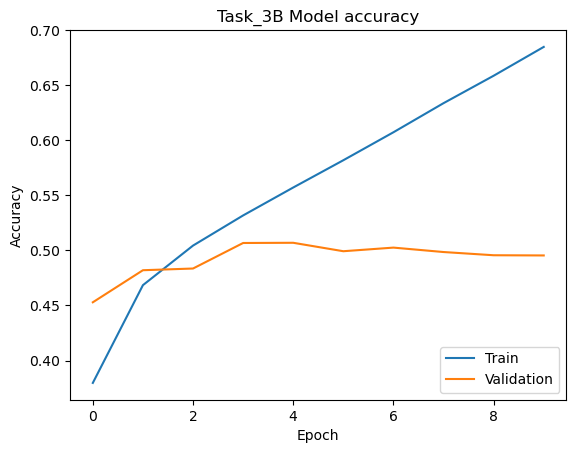

In [105]:
# Plot the training and validation accuracy for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Task_3B Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [106]:
# Evaluate the model on the test set
loss, accuracy = my_conv_race.evaluate(val, y_race_val)

print("Final test set loss: {:.3f}".format(loss))
print("Final test set accuracy: {:.3f}".format(accuracy))

343/343 [==============================] - 4s 12ms/step - loss: 1.4910 - accuracy: 0.4954
Final test set loss: 1.491
Final test set accuracy: 0.495


In [107]:
# Predict the classes of the test set
y_pred = np.argmax(my_conv_race.predict(val), axis=-1)

y_true = np.argmax(y_race_val, axis=1)
#np.argmax(y1_val, axis=1)
y_true

343/343 [==============================] - 4s 13ms/step


array([1, 1, 6, ..., 3, 1, 3], dtype=int64)

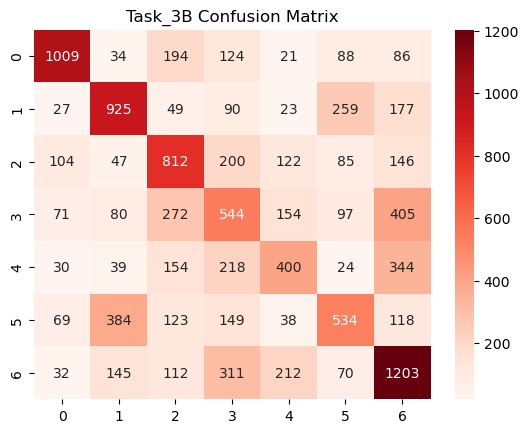

In [110]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.title('Task_3B Confusion Matrix')
plt.show()

# Task 4: Custom Convolutional Neural Network
## Labels - Gender and Race

In [130]:
from tensorflow.keras.layers import Input, Dense, Concatenate, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model

input_shape = (img_height, img_width, img_channels)

# Define input layer
input_layer = Input(shape=(input_shape))

# Define shared hidden layers
layer_1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
layer_2 = Conv2D(64, (3, 3), activation='relu')(layer_1)
layer_3 = MaxPooling2D( (3, 3))(layer_2)
layer_4 = Conv2D(128, (3, 3), activation='relu')(layer_3)
layer_5 = Conv2D(256, (3, 3), activation='relu')(layer_4)
layer_6 = MaxPooling2D( (3, 3))(layer_5)

layer_7 = Flatten()(layer_6)
layer_8 = Dense(64, activation='relu')(layer_7)
layer_9 = Dense(32, activation='relu')(layer_8)

# Define gender output layer
gender_output = Dense(y_gender_train.shape[1], activation='softmax', name='gender_output')(layer_9)

# Define race output layer
race_output = Dense(y_race_train.shape[1], activation='softmax', name='race_output')(layer_9)

# Concatenate the output layers
# output_layer = Concatenate()([gender_output, race_output])

# Define the model with multiple outputs
model_combined = Model(inputs=input_layer, outputs=[gender_output, race_output])



model_combined.summary()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_41 (Conv2D)             (None, 30, 30, 32)   896         ['input_9[0][0]']                
                                                                                                  
 conv2d_42 (Conv2D)             (None, 28, 28, 64)   18496       ['conv2d_41[0][0]']              
                                                                                                  
 max_pooling2d_26 (MaxPooling2D  (None, 9, 9, 64)    0           ['conv2d_42[0][0]']              
 )                                                                                          

In [134]:
# Compile the model with appropriate loss functions for both tasks

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_combined.compile(optimizer=opt, loss={'gender_output': 'categorical_crossentropy', 'race_output': 'categorical_crossentropy'},
              metrics='accuracy')

In [135]:
# Train the model on the dataset
history = model_combined.fit(x_train, {'gender_output': y_gender_train, 'race_output': y_race_train}, epochs=10, batch_size=64, validation_data=(val, {'gender_output': y_gender_val, 'race_output': y_race_val}))

Epoch 1/10
1356/1356 [==============================] - 211s 154ms/step - loss: 2.2367 - gender_output_loss: 0.5694 - race_output_loss: 1.6674 - gender_output_accuracy: 0.6853 - race_output_accuracy: 0.3428 - val_loss: 1.9581 - val_gender_output_loss: 0.4888 - val_race_output_loss: 1.4693 - val_gender_output_accuracy: 0.7513 - val_race_output_accuracy: 0.4277
Epoch 2/10
1356/1356 [==============================] - 214s 158ms/step - loss: 1.8865 - gender_output_loss: 0.4639 - race_output_loss: 1.4227 - gender_output_accuracy: 0.7672 - race_output_accuracy: 0.4454 - val_loss: 1.8398 - val_gender_output_loss: 0.4441 - val_race_output_loss: 1.3957 - val_gender_output_accuracy: 0.7838 - val_race_output_accuracy: 0.4559
Epoch 3/10
1356/1356 [==============================] - 236s 174ms/step - loss: 1.7598 - gender_output_loss: 0.4284 - race_output_loss: 1.3314 - gender_output_accuracy: 0.7902 - race_output_accuracy: 0.4827 - val_loss: 1.8011 - val_gender_output_loss: 0.4294 - val_race_output

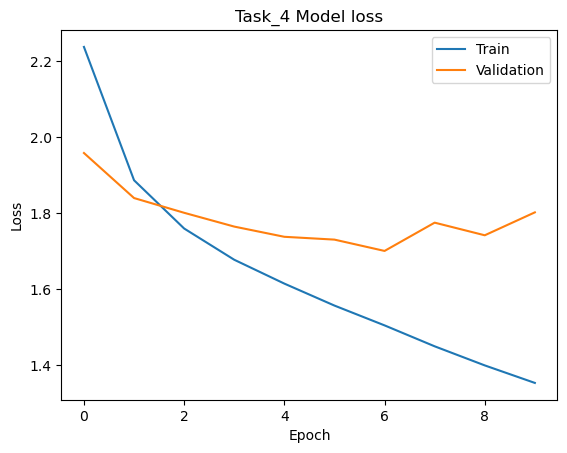

In [136]:
import matplotlib.pyplot as plt
# Plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Task_4 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

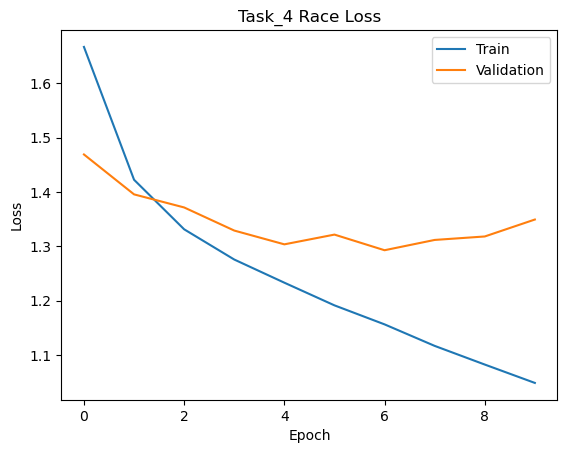

In [137]:
import matplotlib.pyplot as plt
# Plot the training and validation loss for each epoch
plt.plot(history.history['race_output_loss'])
plt.plot(history.history['val_race_output_loss'])
plt.title('Task_4 Race Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

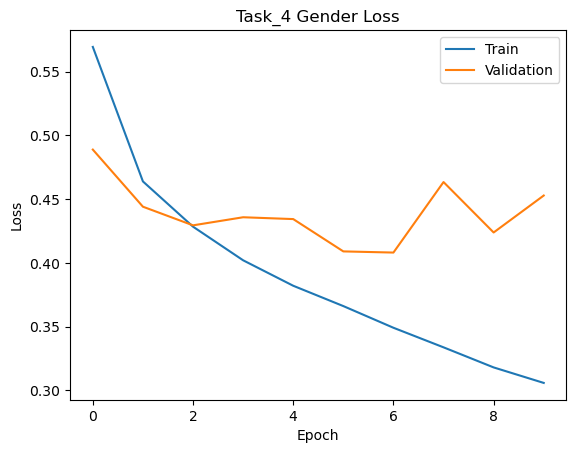

In [138]:
import matplotlib.pyplot as plt
# Plot the training and validation loss for each epoch
plt.plot(history.history['gender_output_loss'])
plt.plot(history.history['val_gender_output_loss'])
plt.title('Task_4 Gender Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

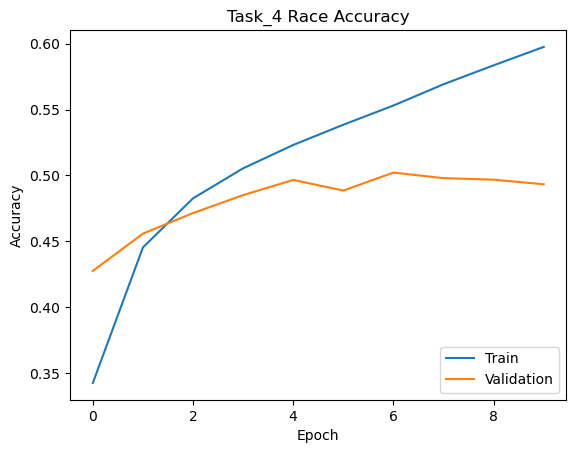

In [139]:
# Plot the training and validation accuracy for each epoch
plt.plot(history.history['race_output_accuracy'])
plt.plot(history.history['val_race_output_accuracy'])
plt.title('Task_4 Race Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

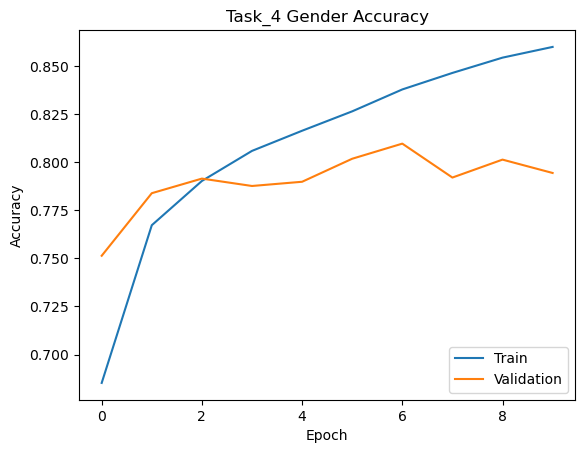

In [140]:
# Plot the training and validation accuracy for each epoch
plt.plot(history.history['gender_output_accuracy'])
plt.plot(history.history['val_gender_output_accuracy'])
plt.title('Task_4 Gender Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [143]:
# Evaluate the model on the test set
model_combined.evaluate(val, {'gender_output': y_gender_val, 'race_output': y_race_val})

343/343 [==============================] - 9s 26ms/step - loss: 1.8022 - gender_output_loss: 0.4528 - race_output_loss: 1.3494 - gender_output_accuracy: 0.7943 - race_output_accuracy: 0.4933


[1.8022048473358154,
 0.4528225064277649,
 1.3493828773498535,
 0.7943217158317566,
 0.4933357536792755]

In [144]:
# Predict the labels for the validation data
y_val_pred = model_combined.predict(val)

# Predict the classes of the test set
y_val_gender_pred = np.argmax(y_val_pred[0], axis=1)
y_val_race_pred = np.argmax(y_val_pred[1], axis=1)

import numpy as np
from sklearn.metrics import confusion_matrix
# Compute the confusion matrix for race prediction
gender_cm = confusion_matrix(np.argmax(y1_val, axis=1), y_val_gender_pred)


# Compute the confusion matrix for gender prediction
race_cm = confusion_matrix(np.argmax(y2_val, axis=1), y_val_race_pred)

343/343 [==============================] - 13s 37ms/step


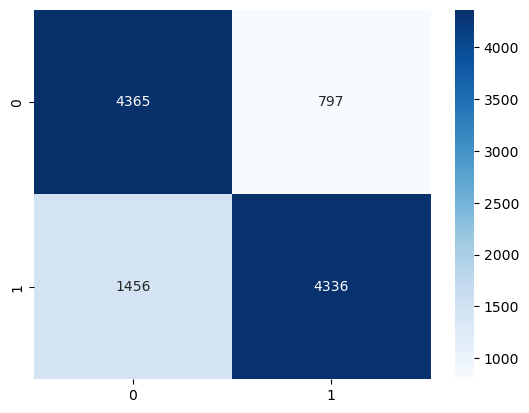

In [145]:
sns.heatmap(gender_cm, annot=True, cmap='Blues', fmt='d')
plt.show()

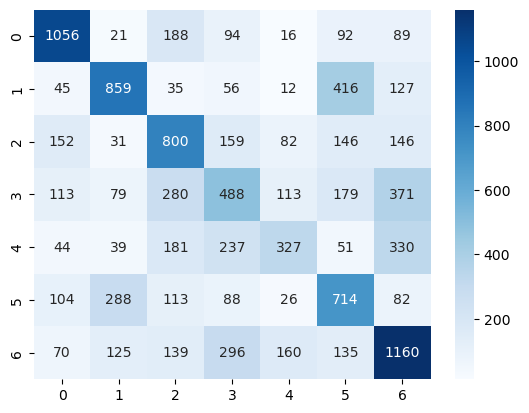

In [146]:
sns.heatmap(race_cm, annot=True, cmap='Blues', fmt='d')
plt.show()